In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('data/newdf.csv')

In [13]:
df.columns = df.columns.str.lower()

In [59]:
df = df[df.payment_type != 2]

In [60]:
df.shape

(2074630, 20)

In [11]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923399 entries, 0 to 5923398
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tip                    int64  
 1   car_type               object 
 2   pickup_datetime        object 
 3   dropoff_datetime       object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   ratecodeid             object 
 7   payment_type           object 
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  week_of_month          int64  
 15  pickup_hour            int64  
 16  dropoff_hour           int64  
 17  day                    object 
 18  pickup_borough         object 
 19  dropoff_borough        object 
dtypes: float64(7), int64(5), object(8)
memory usage: 903.8+ MB


In [6]:
df.drop(columns = ['pickup_datetime','dropoff_datetime','car_type',
                  'pickup_location_id','dropoff_location_id',
                  'pickup_zone','dropoff_zone'], inplace=True)

df.week_of_month = df.week_of_month.astype('object')
df.pickup_hour = df.pickup_hour.astype('object')
df.dropoff_hour = df.dropoff_hour.astype('object')

In [ ]:
df.drop(columns=['car_type'],)

In [5]:
X, y = df.iloc[:,1:], df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)


# Decision Tree Baseline

In [6]:
dt = DecisionTreeClassifier()

In [7]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9999994372599738

In [19]:
dt.score(X_train, y_train)

0.9999994372599738

In [20]:
dt.score(X_test, y_test)

0.9979319309855826

In [8]:
dt_preds = dt.predict(X_test)

In [9]:
dt_confusion = confusion_matrix(y_test, dt_preds)

In [10]:
dt_confusion

array([[  88623,    1194],
       [   1287, 1093576]])

In [24]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, dt_preds), 
                                                     recall_score(y_test, dt_preds)))



Precision: 0.9989,   Recall: 0.9988


In [69]:
dt.feature_importances_

array([0.00179286, 0.00076944, 0.02057544, 0.08182377, 0.01194875,
       0.01465621, 0.15715645, 0.29493906, 0.07922079, 0.00025151,
       0.01859738, 0.31826386, 0.00000447])

# Random Forest Baseline

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

In [73]:
rf.score(X_test, y_test)

0.9945604758438854

In [74]:
rf_preds = rf.predict(X_test)

In [75]:
rf_confusion = confusion_matrix(y_test, rf_preds)

In [76]:
rf_confusion

array([[ 17521,   1950],
       [   307, 395148]])

In [77]:
rf.feature_importances_

array([0.00503696, 0.01047428, 0.08216666, 0.07122501, 0.0554572 ,
       0.04961172, 0.12391392, 0.22129063, 0.0252276 , 0.00772313,
       0.00992121, 0.33794431, 0.00000738])

In [78]:
X_train.columns

Index(['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid',
       'pickup_location_id', 'dropoff_location_id', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [79]:
feature_names = list(X_train.columns)

In [80]:
for name, importance in zip(X_train[feature_names], rf.feature_importances_):
    print(name, "=", importance)

vendorid = 0.005036955764487978
passenger_count = 0.010474277025751676
trip_distance = 0.08216666414501457
ratecodeid = 0.07122501474334872
pickup_location_id = 0.05545719746306311
dropoff_location_id = 0.04961172373367615
payment_type = 0.12391392410746688
fare_amount = 0.22129062950896222
extra = 0.025227595801614166
mta_tax = 0.007723126901394376
tolls_amount = 0.009921205619283845
total_amount = 0.3379443061081476
congestion_surcharge = 7.379077788531715e-06


KeyError: 12

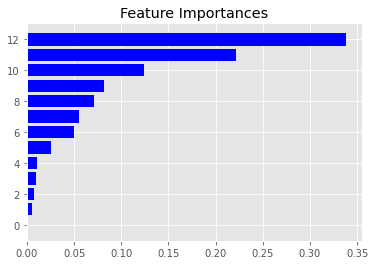

In [81]:
features = df[feature_names]
importances = rf.feature_importances_
indicies = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks([features[i] for i in indicies])

In [82]:
importancedf = pd.Series(rf.feature_importances_, index = X_train.columns)

<AxesSubplot:>

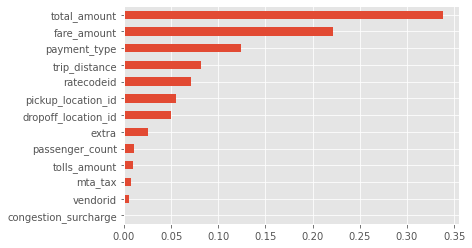

In [83]:
importancedf.sort_values().plot(kind='barh')

In [84]:
X_train.payment_type.value_counts()

1    1646880
3       9766
4       3058
Name: payment_type, dtype: int64

In [13]:
dtimportancedf = pd.Series(dt.feature_importances_, index = X_train.columns)

<AxesSubplot:>

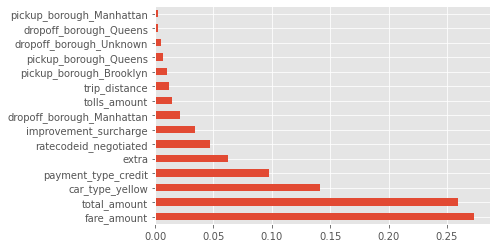

In [39]:
dtimportancedf.sort_values(ascending=False)[:15].plot(kind = 'barh')

In [38]:
dtimportancedf.sort_values(ascending=False)[:10]

fare_amount                  0.273159
total_amount                 0.259116
car_type_yellow              0.141069
payment_type_credit          0.097670
extra                        0.062087
ratecodeid_negotiated        0.047086
improvement_surcharge        0.033841
dropoff_borough_Manhattan    0.021394
tolls_amount                 0.014285
trip_distance                0.012357
dtype: float64